# Chapter 6: How to clean the data

In [1]:
import pandas as pd

## What the info() method can tell you

In [4]:
polls = pd.read_csv('..\ch05\president_polls_2016.csv')

In [5]:
polls.info(verbose=True, memory_usage='deep', show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12624 entries, 0 to 12623
Data columns (total 27 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cycle             12624 non-null  int64  
 1   branch            12624 non-null  object 
 2   type              12624 non-null  object 
 3   matchup           12624 non-null  object 
 4   forecastdate      12624 non-null  object 
 5   state             12624 non-null  object 
 6   startdate         12624 non-null  object 
 7   enddate           12624 non-null  object 
 8   pollster          12624 non-null  object 
 9   grade             11337 non-null  object 
 10  samplesize        12621 non-null  float64
 11  population        12624 non-null  object 
 12  poll_wt           12624 non-null  float64
 13  rawpoll_clinton   12624 non-null  float64
 14  rawpoll_trump     12624 non-null  float64
 15  rawpoll_johnson   8397 non-null   float64
 16  rawpoll_mcmullin  90 non-null     float6

In [ ]:
# NOTE: This may take a long time to run
jobs = pd.read_excel('../../data/oesm18all/all_data_M_2018.xlsx')

In [ ]:
jobs.info(verbose=True, memory_usage='deep', show_counts=True)

## What the unique values can tell you

In [6]:
polls.nunique()

cycle                   1
branch                  1
type                    3
matchup                 1
forecastdate            1
state                  57
startdate             352
enddate               345
pollster              196
grade                  10
samplesize           1766
population              4
poll_wt              4399
rawpoll_clinton      1312
rawpoll_trump        1385
rawpoll_johnson       584
rawpoll_mcmullin       16
adjpoll_clinton     12569
adjpoll_trump       12582
adjpoll_johnson      6629
adjpoll_mcmullin       57
multiversions           1
url                  1304
poll_id              4208
question_id          4208
createddate           222
timestamp               3
dtype: int64

In [9]:
polls.apply(pd.unique)

cycle                                                          [2016]
branch                                                    [President]
type                               [polls-plus, now-cast, polls-only]
matchup                               [Clinton vs. Trump vs. Johnson]
forecastdate                                                [11/8/16]
state               [U.S., New Mexico, Virginia, Iowa, Wisconsin, ...
startdate           [11/3/2016, 11/1/2016, 11/2/2016, 11/4/2016, 1...
enddate             [11/6/2016, 11/7/2016, 11/5/2016, 11/4/2016, 1...
pollster            [ABC News/Washington Post, Google Consumer Sur...
grade                       [A+, B, A-, B-, A, nan, B+, C+, C-, C, D]
samplesize          [2220.0, 26574.0, 2195.0, 3677.0, 16639.0, 129...
population                                             [lv, rv, a, v]
poll_wt             [8.720654, 7.628472, 6.424334, 6.087135, 5.316...
rawpoll_clinton     [47.0, 38.03, 42.0, 45.0, 48.0, 44.0, 46.0, 41...
rawpoll_trump       

## What the value counts can tell you

In [11]:
polls.state.value_counts().head(10)

U.S.              3318
Florida            444
North Carolina     375
Pennsylvania       375
Ohio               345
New Hampshire      336
Nevada             279
Virginia           273
Michigan           258
Wisconsin          240
Name: state, dtype: int64

In [13]:
polls.state.value_counts(normalize=True)

U.S.                    0.262833
Florida                 0.035171
North Carolina          0.029705
Pennsylvania            0.029705
Ohio                    0.027329
New Hampshire           0.026616
Nevada                  0.022101
Virginia                0.021625
Michigan                0.020437
Wisconsin               0.019011
Georgia                 0.019011
Colorado                0.019011
Arizona                 0.018774
California              0.016873
Iowa                    0.016635
Missouri                0.016160
Utah                    0.015684
New York                0.014971
Illinois                0.014259
Texas                   0.013783
Indiana                 0.013308
New Jersey              0.012833
Oregon                  0.012833
Maine                   0.012595
South Carolina          0.012357
Washington              0.012120
Massachusetts           0.012120
New Mexico              0.012120
Kansas                  0.012120
Louisiana               0.011882
Kentucky  

In [16]:
 polls.multiversions.value_counts(dropna=False)
#polls.multiversions.value_counts()

NaN    12588
*         36
Name: multiversions, dtype: int64

In [17]:
polls[['state','grade']].value_counts()

state          grade
U.S.           A-       1215
               C+        546
               B         162
               C-        126
               A+        114
                        ... 
Nebraska CD-1  B           3
Indiana        A           3
Nebraska CD-2  B           3
Missouri       A           3
Mississippi    C           3
Length: 321, dtype: int64

## How to drop rows

In [ ]:
#polls = polls[polls.type == 'now-cast']

In [18]:
polls = polls.query('type == "now-cast"')

In [20]:
import sqlite3
fires_con = sqlite3.connect('../ch05/Data/FPA_FOD_20170508.sqlite')
fires = pd.read_sql_query(
    '''SELECT STATE, FIRE_YEAR, DATETIME(DISCOVERY_DATE) AS DISCOVERY_DATE,
              FIRE_NAME, FIRE_SIZE, LATITUDE, LONGITUDE
       FROM Fires''', fires_con)
fires.columns = fires.columns.str.lower()

In [21]:
fires[fires.duplicated(keep=False)]

,state,fire_year,discovery_date,fire_name,fire_size,latitude,longitude
48642,CA,1992,1992-06-28 00:00:00,None,0.1,36.021667,-118.805000
48644,CA,1992,1992-06-28 00:00:00,None,0.1,36.021667,-118.805000
71593,WA,1994,1994-08-06 00:00:00,None,0.1,46.441667,-121.783333
189841,WA,1992,1992-09-06 00:00:00,None,0.1,47.908200,-117.992700
193186,MT,1992,1992-08-14 00:00:00,None,2.0,45.083300,-107.534000
...,...,...,...,...,...,...,...
1871739,CA,2015,2015-12-20 00:00:00,DEER HOLLOW WY / PEPPERCO,0.1,33.458184,-117.086954
1871904,CA,2015,2015-12-20 00:00:00,DEER HOLLOW WY / PEPPERCO,0.1,33.458184,-117.086954
1872000,CA,2015,2015-12-20 00:00:00,DEER HOLLOW WY / PEPPERCO,0.1,33.458184,-117.086954
1876440,CA,2015,2015-05-19 00:00:00,None,1.0,34.003623,-117.167418


In [22]:
fires.drop_duplicates(keep='first', inplace=True)

## How to drop columns

In [23]:
polls.nunique()

cycle                  1
branch                 1
type                   1
matchup                1
forecastdate           1
state                 57
startdate            352
enddate              345
pollster             196
grade                 10
samplesize          1766
population             4
poll_wt             3894
rawpoll_clinton     1312
rawpoll_trump       1385
rawpoll_johnson      584
rawpoll_mcmullin      16
adjpoll_clinton     4202
adjpoll_trump       4199
adjpoll_johnson     2210
adjpoll_mcmullin      30
multiversions          1
url                 1304
poll_id             4208
question_id         4208
createddate          222
timestamp              1
dtype: int64

In [ ]:
#polls = polls.drop(columns=['cycle','forecastdate'])

In [24]:
polls.drop(columns=['cycle','forecastdate'], errors='raise', inplace=True)

## How to rename columns

In [25]:
polls = polls.rename(columns={
    'rawpoll_clinton':'clinton_pct',
    'rawpoll_trump':'trump_pct'})

In [26]:
polls_names_dict = {'rawpoll_clinton':'clinton_pct',
                    'rawpoll_trump':'trump_pct'}
polls.rename(columns = polls_names_dict, inplace = True)

In [27]:
polls.columns = polls.columns.str.replace('_pct','')

In [28]:
jobs.columns = jobs.columns \
    .str.replace('^a_','annual_') \
    .str.replace('^h_','hourly_') \
    .str.replace('_pct','_percent')

NameError: name 'jobs' is not defined

## How to find missing values

In [29]:
mortality_data = pd.read_csv('mortality_missing_values.csv')

In [30]:
mortality_data.head(5)

,Year,AgeGroup,DeathRate
0,1900.0,01-04 Years,1983.8
1,NaN,01-04 Years,1695.0
2,1902.0,01-04 Years,NaN
3,1903.0,01-04 Years,1542.1
4,NaN,01-04 Years,NaN


In [31]:
mortality_data.loc[5:9]

,Year,AgeGroup,DeathRate
5,1905.0,01-04 Years,1498.9
6,NaN,01-04 Years,NaN
7,1907.0,01-04 Years,NaN
8,1908.0,01-04 Years,1396.8
9,1909.0,01-04 Years,1348.9


In [33]:
 mortality_data.shape

(476, 3)

In [34]:
mortality_data.count()

Year         473
AgeGroup     476
DeathRate    472
dtype: int64

In [32]:
missing_count = mortality_data.shape[0] - mortality_data.count()
print(missing_count)

Year         3
AgeGroup     0
DeathRate    4
dtype: int64


In [35]:
mortality_data[mortality_data.isnull().any(axis=1)]

,Year,AgeGroup,DeathRate
1,NaN,01-04 Years,1695.0
2,1902.0,01-04 Years,NaN
4,NaN,01-04 Years,NaN
6,NaN,01-04 Years,NaN
7,1907.0,01-04 Years,NaN


In [36]:
mortality_data[mortality_data.DeathRate.isnull()]

,Year,AgeGroup,DeathRate
2,1902.0,01-04 Years,NaN
4,NaN,01-04 Years,NaN
6,NaN,01-04 Years,NaN
7,1907.0,01-04 Years,NaN


In [37]:
mortality_data[mortality_data.DeathRate.notnull()]

,Year,AgeGroup,DeathRate
0,1900.0,01-04 Years,1983.8
1,NaN,01-04 Years,1695.0
3,1903.0,01-04 Years,1542.1
5,1905.0,01-04 Years,1498.9
8,1908.0,01-04 Years,1396.8
...,...,...,...
471,2014.0,15-19 Years,45.5
472,2015.0,15-19 Years,48.3
473,2016.0,15-19 Years,51.2
474,2017.0,15-19 Years,51.5


## How to drop rows with missing values

In [38]:
mortality_data = mortality_data.dropna()
mortality_data.head()

,Year,AgeGroup,DeathRate
0,1900.0,01-04 Years,1983.8
3,1903.0,01-04 Years,1542.1
5,1905.0,01-04 Years,1498.9
8,1908.0,01-04 Years,1396.8
9,1909.0,01-04 Years,1348.9


In [39]:
mortality_data.dropna(thresh=2, inplace=True)

In [40]:
mortality_data.dropna(subset=['DeathRate'], inplace=True)

## How to fill missing values

In [41]:
mortality_data = pd.read_csv('mortality_missing_values.csv')
mortality_data.head()

,Year,AgeGroup,DeathRate
0,1900.0,01-04 Years,1983.8
1,NaN,01-04 Years,1695.0
2,1902.0,01-04 Years,NaN
3,1903.0,01-04 Years,1542.1
4,NaN,01-04 Years,NaN


In [42]:
mortality_data.DeathRate.fillna(value=mortality_data.DeathRate.median(), inplace=True)
mortality_data.head(4)

,Year,AgeGroup,DeathRate
0,1900.0,01-04 Years,1983.8
1,NaN,01-04 Years,1695.0
2,1902.0,01-04 Years,88.4
3,1903.0,01-04 Years,1542.1


In [43]:
mortality_data = pd.read_csv('mortality_missing_values.csv')
mortality_data.fillna(method = 'ffill', limit=2, inplace=True)
mortality_data.head(4)

,Year,AgeGroup,DeathRate
0,1900.0,01-04 Years,1983.8
1,1900.0,01-04 Years,1695.0
2,1902.0,01-04 Years,1695.0
3,1903.0,01-04 Years,1542.1


In [44]:
mortality_data = pd.read_csv('mortality_missing_values.csv')
mortality_data = mortality_data.interpolate()
mortality_data.head(4)

,Year,AgeGroup,DeathRate
0,1900.0,01-04 Years,1983.80
1,1901.0,01-04 Years,1695.00
2,1902.0,01-04 Years,1618.55
3,1903.0,01-04 Years,1542.10


In [50]:
polls.dtypes

branch               object
type                 object
matchup              object
state                object
startdate            object
enddate              object
pollster             object
grade                object
samplesize          float64
population           object
poll_wt             float64
clinton             float64
trump               float64
rawpoll_johnson     float64
rawpoll_mcmullin    float64
adjpoll_clinton     float64
adjpoll_trump       float64
adjpoll_johnson     float64
adjpoll_mcmullin    float64
multiversions        object
url                  object
poll_id               int64
question_id           int64
createddate          object
timestamp            object
dtype: object

## How to find date and number columns that are imported as objects

In [51]:
polls.select_dtypes('float64').head(2)

,samplesize,poll_wt,clinton,trump,rawpoll_johnson,rawpoll_mcmullin,adjpoll_clinton,adjpoll_trump,adjpoll_johnson,adjpoll_mcmullin
4208,2220.0,8.720654,47.00,43.00,4.00,NaN,45.23046,41.68534,4.649687,NaN
4209,26574.0,7.628472,38.03,35.69,5.46,NaN,43.36603,41.20737,5.175080,NaN


In [ ]:
jobs.select_dtypes('object').head(2)

## How to convert date and time strings to the datetime data type

In [52]:
date_cols = ['startdate','enddate','createddate','timestamp']
polls[date_cols].head(2)

,startdate,enddate,createddate,timestamp
4208,11/3/2016,11/6/2016,11/7/16,09:24:53 8 Nov 2016
4209,11/1/2016,11/7/2016,11/7/16,09:24:53 8 Nov 2016


In [53]:
polls[date_cols] = polls[date_cols].apply(pd.to_datetime)
polls[date_cols].head(2)

,startdate,enddate,createddate,timestamp
4208,2016-11-03,2016-11-06,2016-11-07,2016-11-08 09:24:53
4209,2016-11-01,2016-11-07,2016-11-07,2016-11-08 09:24:53


In [54]:
polls.dtypes

branch                      object
type                        object
matchup                     object
state                       object
startdate           datetime64[ns]
enddate             datetime64[ns]
pollster                    object
grade                       object
samplesize                 float64
population                  object
poll_wt                    float64
clinton                    float64
trump                      float64
rawpoll_johnson            float64
rawpoll_mcmullin           float64
adjpoll_clinton            float64
adjpoll_trump              float64
adjpoll_johnson            float64
adjpoll_mcmullin           float64
multiversions               object
url                         object
poll_id                      int64
question_id                  int64
createddate         datetime64[ns]
timestamp           datetime64[ns]
dtype: object

In [55]:
polls['startdate'] = polls.startdate.dt.strftime("%m!!!%d???%Y")
polls['enddate'] = polls.enddate.dt.strftime("%m-%d-%y")
polls[date_cols].head(2)

,startdate,enddate,createddate,timestamp
4208,11!!!03???2016,11-06-16,2016-11-07,2016-11-08 09:24:53
4209,11!!!01???2016,11-07-16,2016-11-07,2016-11-08 09:24:53


## How to convert object columns to numeric data types

In [ ]:
# pd.to_numeric(jobs.tot_emp)

In [ ]:
pd.to_numeric(jobs.tot_emp, errors='coerce').tail(3)

## How to work with the category data type

In [56]:
fires.state = fires.state.astype('category')

In [57]:
fires.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1878537 entries, 0 to 1880464
Data columns (total 7 columns):
 #   Column          Dtype   
---  ------          -----   
 0   state           category
 1   fire_year       int64   
 2   discovery_date  object  
 3   fire_name       object  
 4   fire_size       float64 
 5   latitude        float64 
 6   longitude       float64 
dtypes: category(1), float64(3), int64(1), object(2)
memory usage: 102.1+ MB


In [58]:
statCounts = pd.read_stata('../ch05/GSS7218_R3.DTA', columns=['year','wrkstat'])

In [59]:
filteredStatCounts = statCounts.query(
    'wrkstat in ["working fulltime","working parttime","retired"]')
filteredStatCounts.wrkstat.value_counts()

working fulltime    31892
retired              9121
working parttime     6719
temp not working        0
unempl, laid off        0
school                  0
keeping house           0
other                   0
Name: wrkstat, dtype: int64

In [60]:
# produces a warning that you'll learn about in chapter 7
filteredStatCounts['wrkstat'] = \
    filteredStatCounts.wrkstat.cat.remove_unused_categories()
filteredStatCounts.wrkstat.value_counts()

C:\Users\andre\AppData\Local\Temp/ipykernel_10128/410107918.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filteredStatCounts['wrkstat'] = \


working fulltime    31892
retired              9121
working parttime     6719
Name: wrkstat, dtype: int64

## How to replace invalid values and convert a column’s data type

In [ ]:

## How to fix data type problems when you import the data
date_cols = ['forecastdate','startdate','enddate','createddate','timestamp']
polls = pd.read_csv('../../data/president_polls_2016.csv')
polls[date_cols].head(3)

In [62]:
polls_new = pd.read_csv('..\ch05\president_polls_2016.csv', parse_dates=date_cols)
polls_new[date_cols].head(3)

,startdate,enddate,createddate,timestamp
0,2016-11-03,2016-11-06,2016-11-07,2016-11-08 09:35:33
1,2016-11-01,2016-11-07,2016-11-07,2016-11-08 09:35:33
2,2016-11-02,2016-11-06,2016-11-08,2016-11-08 09:35:33


## How to find outliers

In [63]:
mortality_data = pd.read_pickle('mortality_cleaned.pkl')

In [64]:
mortality_group = mortality_data.query('AgeGroup == "15-19 Years"')
mortality_group.head(3)

,Year,AgeGroup,DeathRate
357,1900,15-19 Years,484.8
358,1901,15-19 Years,454.4
359,1902,15-19 Years,421.5


In [65]:
# save DataFrame for later use
mortality_group.to_pickle('mortality_group.pkl')

In [66]:
mortality_group.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,119.0,1959.00000,34.496377,1900.0,1929.50,1959.0,1988.50,2018.0
DeathRate,119.0,177.37479,138.362290,44.8,85.45,106.9,283.65,777.4


<AxesSubplot:xlabel='Year'>

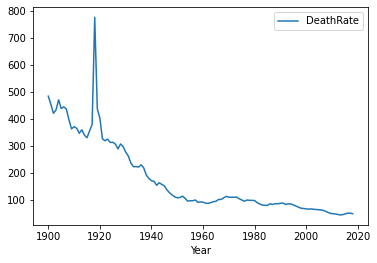

In [67]:
mortality_group.plot(x='Year', y='DeathRate')

In [68]:
mortality_group.query('DeathRate > 500')

,Year,AgeGroup,DeathRate
375,1918,15-19 Years,777.4


## How to fix outliers

<AxesSubplot:xlabel='Year'>

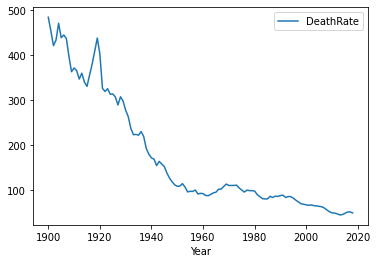

In [70]:
mortality_group = pd.read_pickle('mortality_group.pkl')

mortality_group = mortality_group.query('DeathRate <= 500')
mortality_group.plot(x='Year', y='DeathRate')

<AxesSubplot:xlabel='Year'>

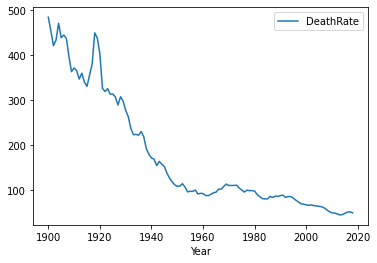

In [71]:
mortality_group = pd.read_pickle('mortality_group.pkl')

mortality_group.loc[mortality_group.DeathRate > 500, 'DeathRate'] = 450
mortality_group.plot(x='Year', y='DeathRate')

<AxesSubplot:xlabel='Year'>

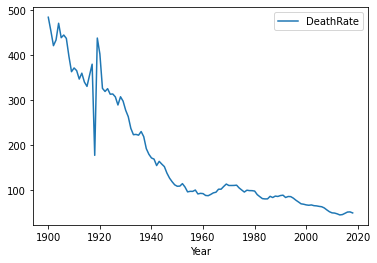

In [72]:
mortality_group = pd.read_pickle('mortality_group.pkl')

mortality_group.loc[mortality_group.DeathRate > 500, 'DeathRate'] \
    = mortality_group.DeathRate.mean()
mortality_group.plot(x='Year', y='DeathRate')

<AxesSubplot:xlabel='Year'>

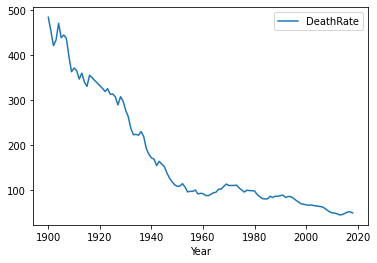

In [73]:
mortality_group = pd.read_pickle('mortality_group.pkl')

mortality_group.loc[mortality_group.Year.isin([1917,1918,1919,1920]),
                    'DeathRate'] = None
mortality_group = mortality_group.interpolate()
mortality_group.plot(x='Year', y='DeathRate')